## K-means clustering algorithms

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs    #Creater isotropic blobs of clustering
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2, random_state=23)

In [8]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

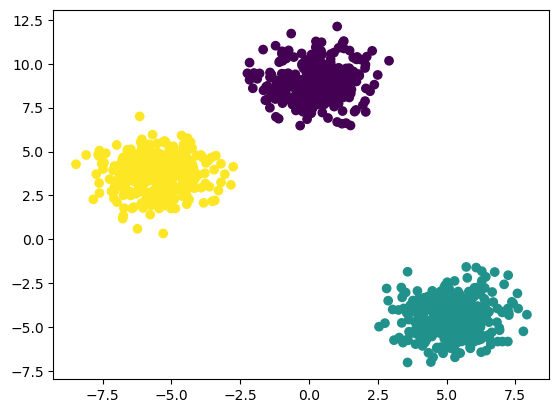

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.33, random_state=42
)

In [13]:
from sklearn.cluster import KMeans

In [17]:
#Elbow method to select K values
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [18]:
wcss

[34827.576825520206,
 7935.437286145418,
 1319.2730531585607,
 1140.4677884655123,
 991.9047984051346,
 853.626951904615,
 764.4973009802694,
 665.7576430497895,
 581.6441558406115,
 531.4245987542353]

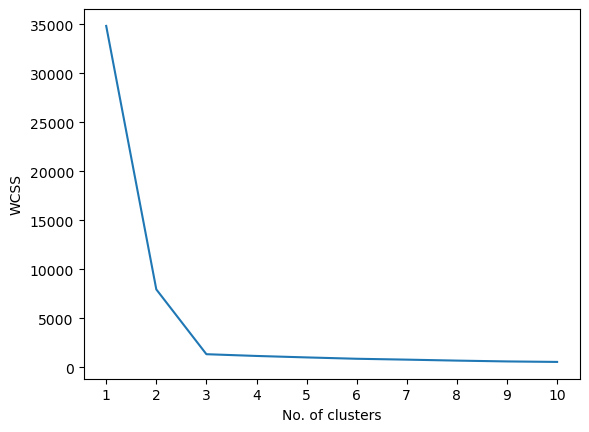

In [19]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [22]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


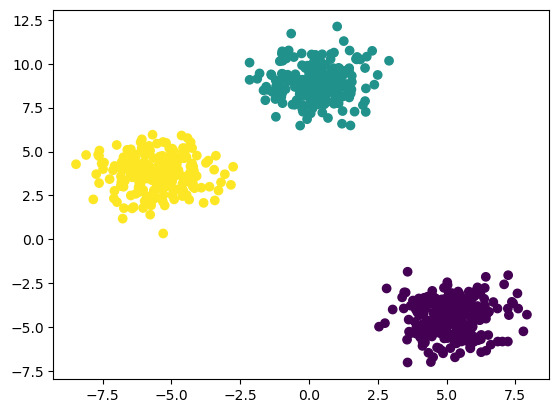

In [23]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [24]:
## knee locator
!pip install kneed

In [25]:
from kneed import KneeLocator

In [27]:
k1 = KneeLocator(range(1,11),wcss,curve="convex", direction="decreasing")

In [29]:
k1.elbow

3

In [30]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [33]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [34]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49134355005793395,
 0.3375447395994776,
 0.3415867123730785,
 0.3380406788434457,
 0.341664665161519,
 0.3393328275566319]

In [ ]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()